In [1]:
import sympy as sp
from mass_mixing import *
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Matrix, cos, sin, sqrt
from sympy.physics.quantum.dagger import Dagger

# Mass mixing matrix

In [2]:
mix = D * C * B * A
mix

Matrix([
[                                                           cos(theta_12)*cos(theta_13),                                                              exp(I*phi2/2)*sin(theta_12)*cos(theta_13), exp(-I*delta)*exp(I*phi3/2)*sin(theta_13)],
[-sin(theta_12)*cos(theta_23) - exp(-I*delta)*sin(theta_13)*sin(theta_23)*cos(theta_12),  (cos(theta_12)*cos(theta_23) - exp(-I*delta)*sin(theta_12)*sin(theta_13)*sin(theta_23))*exp(I*phi2/2), exp(I*phi3/2)*sin(theta_23)*cos(theta_13)],
[ sin(theta_12)*sin(theta_23) - exp(-I*delta)*sin(theta_13)*cos(theta_12)*cos(theta_23), (-sin(theta_23)*cos(theta_12) - exp(-I*delta)*sin(theta_12)*sin(theta_13)*cos(theta_23))*exp(I*phi2/2), exp(I*phi3/2)*cos(theta_13)*cos(theta_23)]])

# 2x2 matrix

Substitute in $\phi_{2}$ = $\phi_{3}$ = $\theta_{13}$ = $\theta_{23}$ = $\delta$ = 0 to obtain the 2-dimensional mixing matrix $U$.




In [3]:
mix_22 = mix.subs({phi2:0, phi3:0, theta_13:0, theta_23:0, delta:0}).evalf().T
mix_22[[0,1],[0,1]]

Matrix([
[cos(theta_12), -sin(theta_12)],
[sin(theta_12),  cos(theta_12)]])

To obtain the matter-mixing hamiltonian in the flavor basis, use the vaccuum hamiltonian:

$$H_{m} = 
\begin{bmatrix}
0 & 0 \\
0 & m_2^2 - m_1^2
\end{bmatrix}$$

and the matter pertubation: 
$$P = \begin{bmatrix}
V_{cc} & 0 \\
0 & 0
\end{bmatrix}$$


The effective hamiltonian for matter mixing matrices: 
$$H_{f} = U H_{m} U^{\dagger} + P$$ 




In [4]:
vcc = sp.symbols('V_cc')
h_f = sp.Matrix([[vcc, 0],[0, 0]])

m1, m2, del_m, e, t = sp.symbols('m_1 m_2 delta_m E t')

h_vac = sp.Matrix([[0, 0],[0, m2**2 -m1**2]])

init_h = (1/(2 * e)) * mix_2d.T * (h_vac) * mix_2d
ham = sp.simplify(init_h)
ham



Matrix([
[(-m_1**2 + m_2**2)*sin(theta)**2/(2*E),  (-m_1**2 + m_2**2)*sin(2*theta)/(4*E)],
[ (-m_1**2 + m_2**2)*sin(2*theta)/(4*E), (-m_1**2 + m_2**2)*cos(theta)**2/(2*E)]])

Substitute in $\delta_{m}^{2} = m^2_{2} - m^2_{1}$, add the matter pertubation, and subtract the common phase:

$$\begin{bmatrix}
\frac{{\delta_{m}^{2} \sin^2(\theta)}}{{2E}} & 0 \\
0 & \frac{{\delta_{m}^{2} \sin^2(\theta)}}{{2E}}
\end{bmatrix}$$


In [5]:
delta_m_eq = sp.Eq(del_m**2, (m2**2 - m1**2))

cor_term = sp.Matrix([[(del_m**2 * sp.sin(theta)**2)/(2 * e), 0],[0, (del_m**2 * sp.sin(theta)**2)/(2 * e)]])# - m2_2e
ham = sp.simplify(ham.subs(delta_m_eq.rhs, delta_m_eq.lhs))

ham = ham + h_f - cor_term

ham_eff = sp.simplify(ham)

ham_eff

Matrix([
[                         V_cc, delta_m**2*sin(2*theta)/(4*E)],
[delta_m**2*sin(2*theta)/(4*E), delta_m**2*cos(2*theta)/(2*E)]])

$$\nu_{f} = U^{m} * \nu_{H}$$


eq 15: 

$$\nu^{\dagger}_{jm} H_{f} \nu_{jm} = H_{im} \delta_{ji}$$


Diagonalization of $H_{f}$ gives you the following identities: 



$$\sin(2\theta_{m})^2 = \frac{\sin(2\theta)^2}{{(\frac{A}{\delta_{m}^2} - \cos(2\theta))^2 + \sin^2(2\theta)}}$$


and

$$\frac{\delta_{m}^2}{\delta^2} = \sqrt{\frac{A}{\delta_{m}^2}- (\cos(2\theta) )^2 + \sin^2(2\theta)}$$



# Steps to derive 3.21, 3.22 in 3d: 

Obtain the hamiltonian for mixing with matter using:

$$H_{m} = 
\begin{bmatrix}
0 & 0 & 0 \\
0 & m_2^2 - m_1^2 & 0\\
0 & 0 & m_3^2 - m_1^2 
\end{bmatrix}$$

and the same perturbation of 

$$H_{m} = 
\begin{bmatrix}
V_{cc} & 0 & 0 \\
0 & 0 & 0\\
0 & 0 & 0 
\end{bmatrix}$$

In [6]:

vcc = sp.symbols('V_cc')
h_f = sp.Matrix([[vcc, 0, 0],[0, 0, 0],[0, 0, 0]])

m1, m2, m3, del_m, e, t = sp.symbols('m_1 m_2 m_3 delta_m E t')

h_vac = sp.Matrix([[0, 0, 0],[0, m2**2 -m1**2, 0], [0, 0, m3**2 -m1**2]])

h_vac

Matrix([
[0,                0,                0],
[0, -m_1**2 + m_2**2,                0],
[0,                0, -m_1**2 + m_3**2]])

In [7]:
init_h = (1/(2 * e)) * mix.T * (h_vac) * mix
ham = sp.simplify(init_h)
del_m13= sp.symbols('delta_m31')
delta_m_eq = sp.Eq(del_m**2, (m2**2 - m1**2))
delta_m31_eq = sp.Eq(del_m**2, (m3**2 - m1**2))

ham = sp.simplify(ham.subs(delta_m_eq.rhs, delta_m_eq.lhs))
ham = sp.simplify(ham.subs(delta_m31_eq.rhs, delta_m31_eq.lhs))
ham

Matrix([
[delta_m**2*(exp(2*I*delta)*sin(theta_12)**2 - sin(theta_12)**2*sin(theta_13)**2 + sin(theta_13)**2)*exp(-2*I*delta)/(2*E),                      delta_m**2*(-exp(2*I*delta) + sin(theta_13)**2)*exp(I*(-2*delta + phi2/2))*sin(theta_12)*cos(theta_12)/(2*E),           delta_m**2*(sin(theta_12 - 2*theta_13) - sin(theta_12 + 2*theta_13))*exp(I*(-delta + phi3/2))/(8*E)],
[             delta_m**2*(-exp(2*I*delta) + sin(theta_13)**2)*exp(I*(-2*delta + phi2/2))*sin(theta_12)*cos(theta_12)/(2*E), delta_m**2*(-exp(2*I*delta)*sin(theta_12)**2 + exp(2*I*delta) + sin(theta_12)**2*sin(theta_13)**2)*exp(-I*(2*delta - phi2))/(2*E), delta_m**2*(-cos(theta_12 - 2*theta_13) + cos(theta_12 + 2*theta_13))*exp(I*(-delta + phi2/2 + phi3/2))/(8*E)],
[                      delta_m**2*(sin(theta_12 - 2*theta_13) - sin(theta_12 + 2*theta_13))*exp(I*(-delta + phi3/2))/(8*E),                     delta_m**2*(-cos(theta_12 - 2*theta_13) + cos(theta_12 + 2*theta_13))*exp(I*(-delta + phi2/2 + phi3/2))/(8*E),   




Using the same diagonalization process on the 3-dimensional hamiltonian, you can recover the relationships [(taken from here)](https://arxiv.org/pdf/1801.10488.pdf):

$$\sin(2\theta_{12}^{m}) = \frac{\cos(\theta_{13}) \cdot  \sin(2\theta_{12})}{\sqrt{(\cos(2\theta_{12}) - \epsilon_{0})^2 + \cos^2(\theta_{13}^{'}) \sin^2(2\theta_{12})}}$$

$$\frac{\Delta m^2_{21}}{2E} = \frac{\Delta m^2_{31}}{2E} \cdot \sqrt{(\cos(2\theta_{12}) - \epsilon_{0})^2 + \cos^2(\theta_{13}^{'}) \sin^2(2\theta_{12})}$$



$$\sin(2\theta_{13}^{m})^2 = \frac{\sin(2\theta_{13})^2}{{(\cos(2\theta_{13}^{'}) - \epsilon_{a})^2 + \sin^2(2\theta_{13})}}$$


and

$$\frac{\delta_{m}^2}{\delta^2} = \sqrt{\frac{A}{\delta_{m}^2}- (\cos(2\theta_{13}) )^2 + \sin^2(2\theta_{13})}$$


where $\epsilon_{a} = \frac{2EV}{\delta m^{2}_{ee}}$ and $\epsilon_{0} = \frac{2EV}{\Delta m^2}{(\cos^2(\theta_{13} + \theta^{'}_{13}) + \frac{\sin^2(\theta^{'}_{13})}{\epsilon_a}}$

# Plot Eq. 3.21, 3.22 in 2D

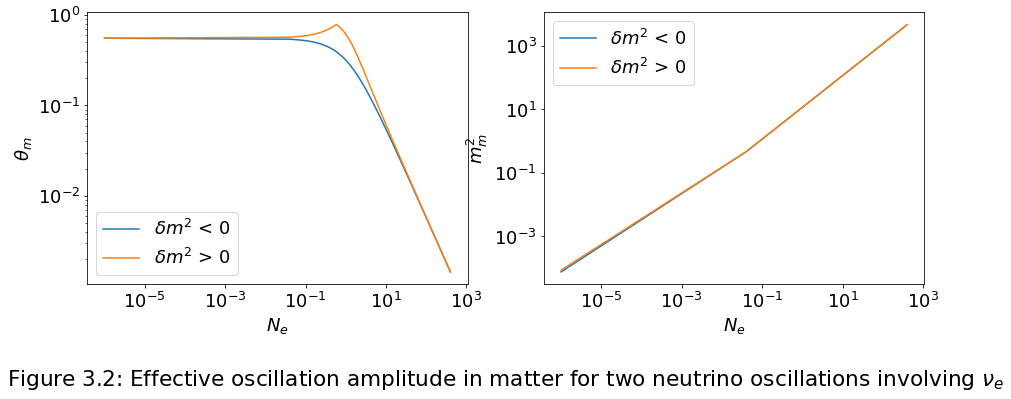

In [8]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

#3.2
A_over_delm, osc_prob_pos, osc_prob_neg = eff_osc_theta(theta = 45, E_nu = .4, R_sun = False, del_m = 8e-5)
ax[0].plot(A_over_delm, osc_prob_pos, label = r"$\delta m^{2}$ < 0")
ax[0].plot(A_over_delm, osc_prob_neg, label = r"$\delta m^{2}$ > 0")

ax[0].set_xlabel(r"$N_{e}$")
ax[0].set_ylabel(r"$\theta_{m}$")
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].legend()





A_over_delm, osc_prob_pos, osc_prob_neg = eff_osc_m_m(theta = 45, del_m12 = 8e-5, E_nu = 6, R_sun = False)
ax[1].plot(A_over_delm, osc_prob_neg, label = r"$\delta m^{2}$ < 0")
ax[1].plot(A_over_delm, osc_prob_pos, label = r"$\delta m^{2}$ > 0")

ax[1].set_xscale("log")
ax[1].set_yscale("log")


ax[1].set_xlabel(r"$N_{e}$")
ax[1].set_ylabel(r"$m^{2}_m$")


plt.title(r"Figure 3.2: Effective oscillation amplitude in matter for two neutrino oscillations involving $\nu_{e}$", y=-.3, x = -.1, pad=-20, verticalalignment="baseline")
plt.legend()
plt.show()

Now we plot the same figure, using values of $N_e$ from the book as a function of the distance from the sun's center.

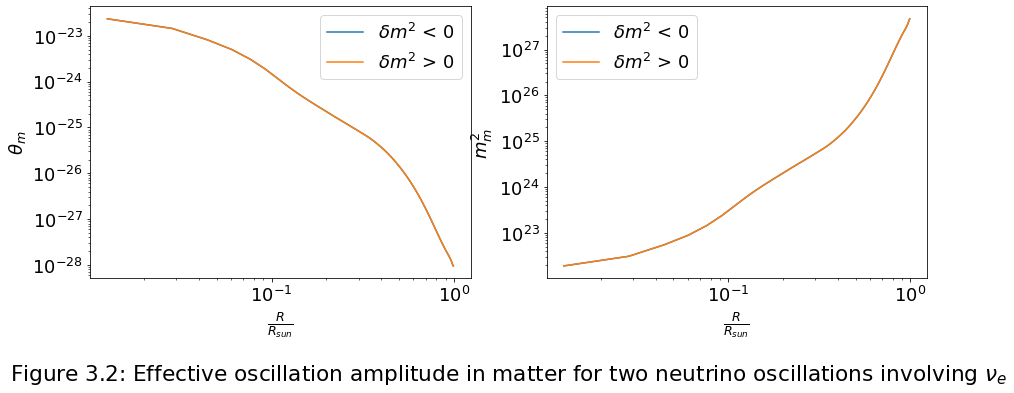

In [9]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

A_over_delm, osc_prob_pos, osc_prob_neg = eff_osc_theta(theta = 45, E_nu = 0.4, R_sun = True, del_m = 8e-5)
ax[0].plot(A_over_delm, osc_prob_pos, label = r"$\delta m^{2}$ < 0")
ax[0].plot(A_over_delm, osc_prob_neg, label = r"$\delta m^{2}$ > 0")

ax[0].set_xlabel(r"$\frac{R}{R_{sun}}$")
ax[0].set_ylabel(r"$\theta_{m}$")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend()

A_over_delm, osc_prob_pos, osc_prob_neg = eff_osc_m_m(theta = 45, del_m12 = 8e-5, E_nu = 0.4, R_sun = True)
ax[1].plot(A_over_delm, osc_prob_neg, label = r"$\delta m^{2}$ < 0")
ax[1].plot(A_over_delm, osc_prob_pos, label = r"$\delta m^{2}$ > 0")

ax[1].set_yscale("log")
ax[1].set_xscale("log")


ax[1].set_xlabel(r"$\frac{R}{R_{sun}}$")
ax[1].set_ylabel(r"$m^{2}_m$")


plt.title(r"Figure 3.2: Effective oscillation amplitude in matter for two neutrino oscillations involving $\nu_{e}$", y=-.3, x = -.1, pad=-20, verticalalignment="baseline")
plt.legend()
plt.show()

# Derivation for long-baseline oscillation probabilities

The full propagation equation for three neutrinos in matter is:

$$i\frac{d \nu_{\alpha}}{dL} = \frac{1}{2 E_{\nu}} \sum_{\beta} (A \delta_{\alpha e} + \sum_{i} V^{*}_{\beta i} \delta m^{2}_{i1} V_{\alpha i})$$

Use the mixing matrix to solve for $P(\nu_{\mu} \rightarrow \nu_{e})$. This is given in section 3.2 in The Physics of Neutrinos by V. Barger et al. 

The matter potential, eq 3.23, is given as $$A = 2  \sqrt{2}  G_{f}  N_{e}  E_{\nu}$$

where $G_{f}$ is the fermi-coupling constant given in $GeV^{-2}$, $E_{\nu}$ is in units of GeV, and $N_{e}$ is the electron number density - we will use $2.5 \cdot N_{a}  cm^{-3}$. We will need to multiply this by $(\frac{\hbar c * 1e2}{1e9})^3$ for the units to work correctly.


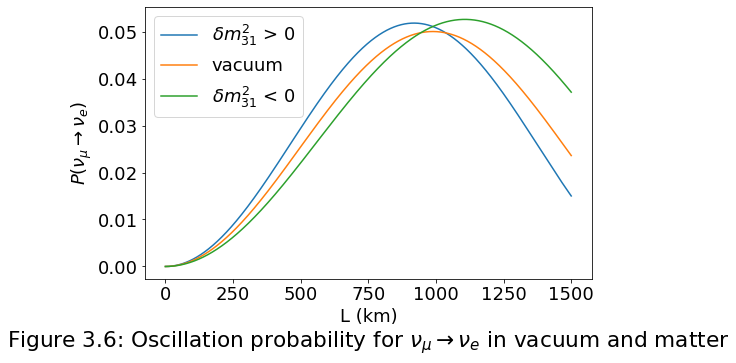

In [10]:
# check units here https://sites.google.com/view/bentleyphysics/MSWflav

fig, ax = plt.subplots(1, 1, figsize = (8, 5))

energy = .4

plt.plot(*prob(which = "greater", energy = energy, sig_m31_2 = 2.543e-3, sig_m21_2 = 8e-5), label = r"$\delta m^{2}_{31}$ > 0")
plt.plot(*prob(which = "vac", energy = energy, sig_m31_2 = 2.543e-3, sig_m21_2 = 8e-5), label = r"vacuum")
plt.plot(*prob(which = "less", energy = energy, sig_m31_2 = 2.543e-3, sig_m21_2 = 8e-5), label = r"$\delta m^{2}_{31}$ < 0")
plt.xlabel(r"L (km)")
plt.ylabel(r"$P(\nu_{\mu} \rightarrow \nu_{e})$")

plt.title(r"Figure 3.6: Oscillation probability for $\nu_{\mu} \rightarrow \nu_{e}$ in vacuum and matter",y=-0.2,pad=-14)
plt.legend()
plt.show()

Fixing the length at 1300 kilometers - the length from the DUNE far-detector from the neutrino source - and varying the energy, we can plot the probabilities.

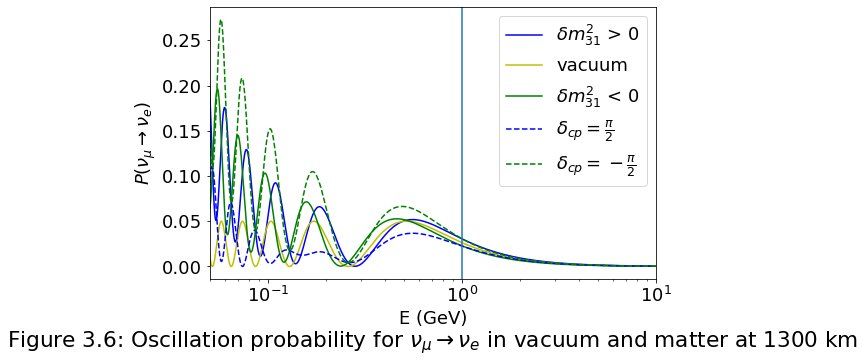

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

length = 1300
plt.plot(*prob(which = "greater", sig_m31_2 = 2.5e-3, sig_m21_2 = 8e-5, length = length, energy = np.linspace(0.05,10,100000)), color = "b", label = r"$\delta m^{2}_{31}$ > 0")
plt.plot(*prob(which = "vac", sig_m31_2 = 2.5e-3, sig_m21_2 = 8e-5, length = length, energy = np.linspace(0.05,10,100000)), color = "y", label = r"vacuum")
plt.plot(*prob(which = "less", sig_m31_2 = 2.5e-3, sig_m21_2 = 8e-5, length = length, energy = np.linspace(0.05,10,100000)), color = "g", label = r"$\delta m^{2}_{31}$ < 0")


plt.plot(*prob(sig = np.pi/2, which = "greater", sig_m31_2 = 2.5e-3, sig_m21_2 = 8e-5,length = length, energy = np.linspace(0.05,10,100000)), color = "b", linestyle = "--", label = r"$\delta_{cp} = \frac{\pi}{2}$")
plt.plot(*prob(sig = -np.pi/2, which = "less", sig_m31_2 = 2.5e-3, sig_m21_2 = 8e-5,length = length, energy = np.linspace(0.05,10,100000)), color = "g", linestyle = "--", label = r"$\delta_{cp} = -\frac{\pi}{2}$")

plt.xlim(0.05, 10)
plt.xscale("log")
plt.axvline(x=1.0)

plt.xlabel(r"E (GeV)")
plt.ylabel(r"$P(\nu_{\mu} \rightarrow \nu_{e})$")

plt.title(r"Figure 3.6: Oscillation probability for $\nu_{\mu} \rightarrow \nu_{e}$ in vacuum and matter at 1300 km",y=-0.2,pad=-14)
plt.legend()
plt.show()